### https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset

---------------

In [1]:
# Read historical crop data into DataFrame
import pandas as pd

df = pd.read_csv("yield_df.csv").drop(columns=["Unnamed: 0"]).rename(columns={"average_rain_fall_mm_per_year": "rainfall_avg_mm"})
df

,Area,Item,Year,hg/ha_yield,rainfall_avg_mm,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [2]:
# Apply labels to categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["area_code"] = le.fit_transform(df["Area"])
df["item_code"] = le.fit_transform(df["Item"])

In [3]:
# Train Test split
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Area", "Item", "Year", "hg/ha_yield"])
y = df[["hg/ha_yield"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=222)

In [4]:
# Build XGBoost Regressor Model
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=777, 
                     learning_rate=0.01,  
                     max_depth=5,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     random_state=222)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=777, n_jobs=None,
             num_parallel_tree=None, random_state=222, ...)

In [5]:
# Evaluation Metrics
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 14569.7002
Mean Squared Error (MSE): 567108672.0000
Root Mean Squared Error (RMSE): 23814.0436
R² Score: 0.9211


In [6]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9275581240653992
0.9211278557777405


<function matplotlib.pyplot.show(close=None, block=None)>

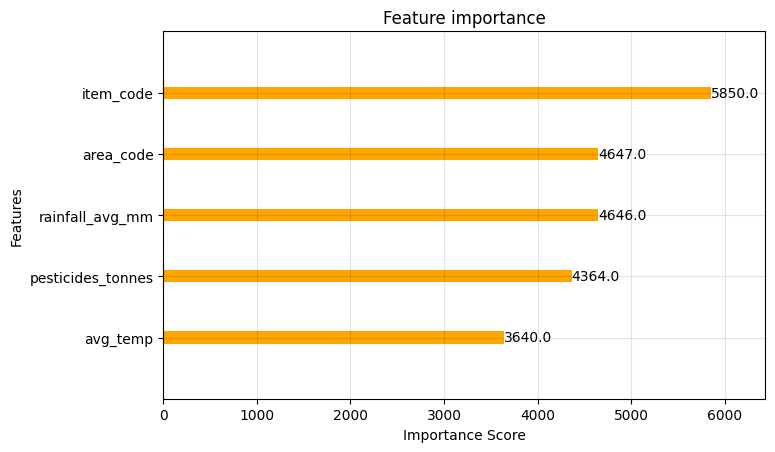

In [7]:
# Feature Importance Plot
import matplotlib.pyplot as plt
import xgboost as xgb

fig, ax = plt.subplots(figsize=(7.77, 4.77))

xgb.plot_importance(model, ax=ax, color="orange")

plt.xlabel("Importance Score", size=10)
plt.ylabel("Features", size=10)

ax.grid(True, color="black", alpha = 0.111)

plt.show